# **Exploratory Data Analysis: eCommerce Transactions Dataset**

**File descriptions:** Dataset consisting of three files:
Customers.csv, Products.csv, and Transactions.csv with the given schema:

**1. Customers.csv:** CustomerID: Unique identifier for each customer, CustomerName: Name of the customer, Region: Continent where the customer resides, SignupDate: Date when the customer signed up.

**2. Products.csv:** ProductID: Unique identifier for each product, ProductName: Name of the product, Category: Product category, Price: Product price in USD.

**3. Transactions.csv:** TransactionID: Unique identifier for each transaction, CustomerID: ID of the customer who made the transaction, ProductID: ID of the product sold, TransactionDate: Date of the transaction, Quantity: Quantity of the product purchased, TotalValue: Total value of the transaction, Price: Price of the product sold.

## 1. Data Preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

customers_df = pd.read_csv('drive/MyDrive/Zeotap Assignment/Data/Customers.csv')
products_df = pd.read_csv('drive/MyDrive/Zeotap Assignment/Data/Products.csv')
transactions_df = pd.read_csv('drive/MyDrive/Zeotap Assignment/Data/Transactions.csv')

In [4]:
customers_df

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [5]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [6]:
products_df

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [7]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [8]:
transactions_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [9]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


The DataFrame has already been thoroughly cleaned and does not require any additional data preprocessing.

## 2. Exploratory Data Analysis

In [52]:
# Joined dataframe
import warnings
warnings.filterwarnings("ignore")
transactions_customers_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='inner')
df = pd.merge(transactions_customers_df, products_df, on='ProductID', how='inner')

df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,Year,Month,Quarter,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,2022,12,4,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,2024,9,3,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,2024,4,2,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,2024,4,2,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,2022,3,1,ComfortLiving Bluetooth Speaker,Electronics,300.68


### 2.1. Top performing products and categories

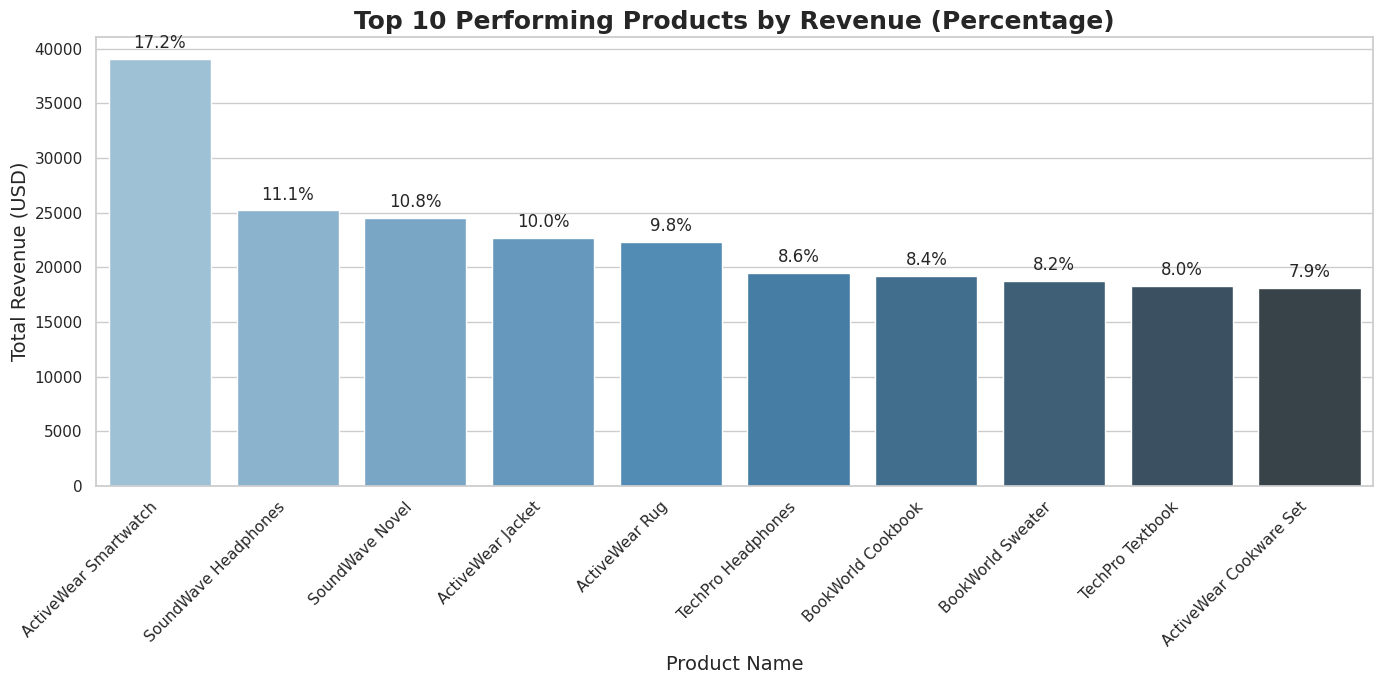

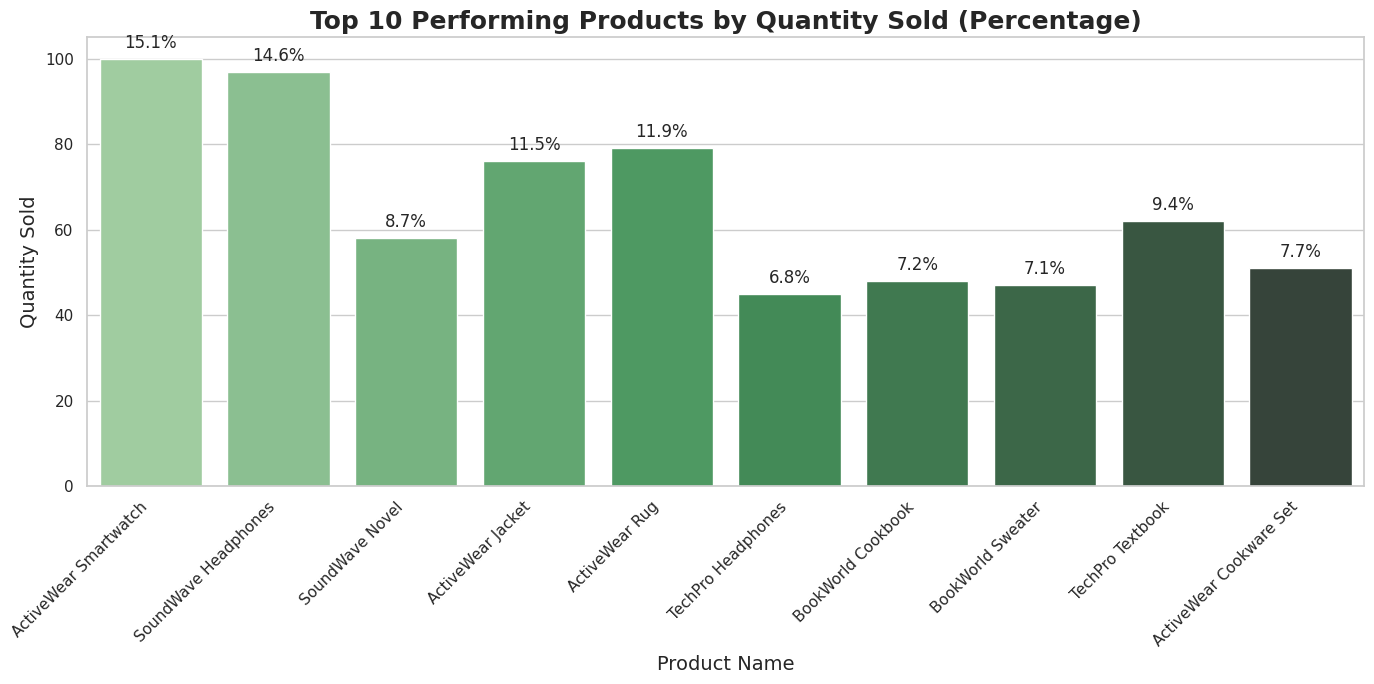

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Top Performing Products
top_products = df.groupby('ProductName')[['TotalValue', 'Quantity']].sum().sort_values(by='TotalValue', ascending=False)

# Top Performing Categories
top_categories = df.groupby('Category')[['TotalValue', 'Quantity']].sum().sort_values(by='TotalValue', ascending=False)

sns.set(style="whitegrid", palette="pastel")
plt.rcParams['font.size'] = 12

def add_percentage_labels(ax, percentages, spacing=5):
    for rect, percentage in zip(ax.patches, percentages):
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        ax.annotate(
            f'{percentage:.1f}%',
            (x_value, y_value),
            xytext=(0, spacing),
            textcoords="offset points",
            ha='center',
            va='bottom')

# Calculate percentages for TotalValue
top_products_total = top_products['TotalValue'].head(10)
total_value_sum = top_products_total.sum()
percentages_total = (top_products_total / total_value_sum) * 100

# Top 10 Performing Products by Total Value
plt.figure(figsize=(14, 7))
ax1 = sns.barplot(x=top_products_total.index, y=top_products_total, palette="Blues_d")
add_percentage_labels(ax1, percentages_total)
plt.title('Top 10 Performing Products by Revenue (Percentage)', fontsize=18, fontweight='bold')
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Total Revenue (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate percentages for Quantity
top_products_quantity = top_products['Quantity'].head(10)
quantity_sum = top_products_quantity.sum()
percentages_quantity = (top_products_quantity / quantity_sum) * 100

# Top 10 Performing Products by Quantity Sold
plt.figure(figsize=(14, 7))
ax2 = sns.barplot(x=top_products_quantity.index, y=top_products_quantity, palette="Greens_d")
add_percentage_labels(ax2, percentages_quantity)
plt.title('Top 10 Performing Products by Quantity Sold (Percentage)', fontsize=18, fontweight='bold')
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


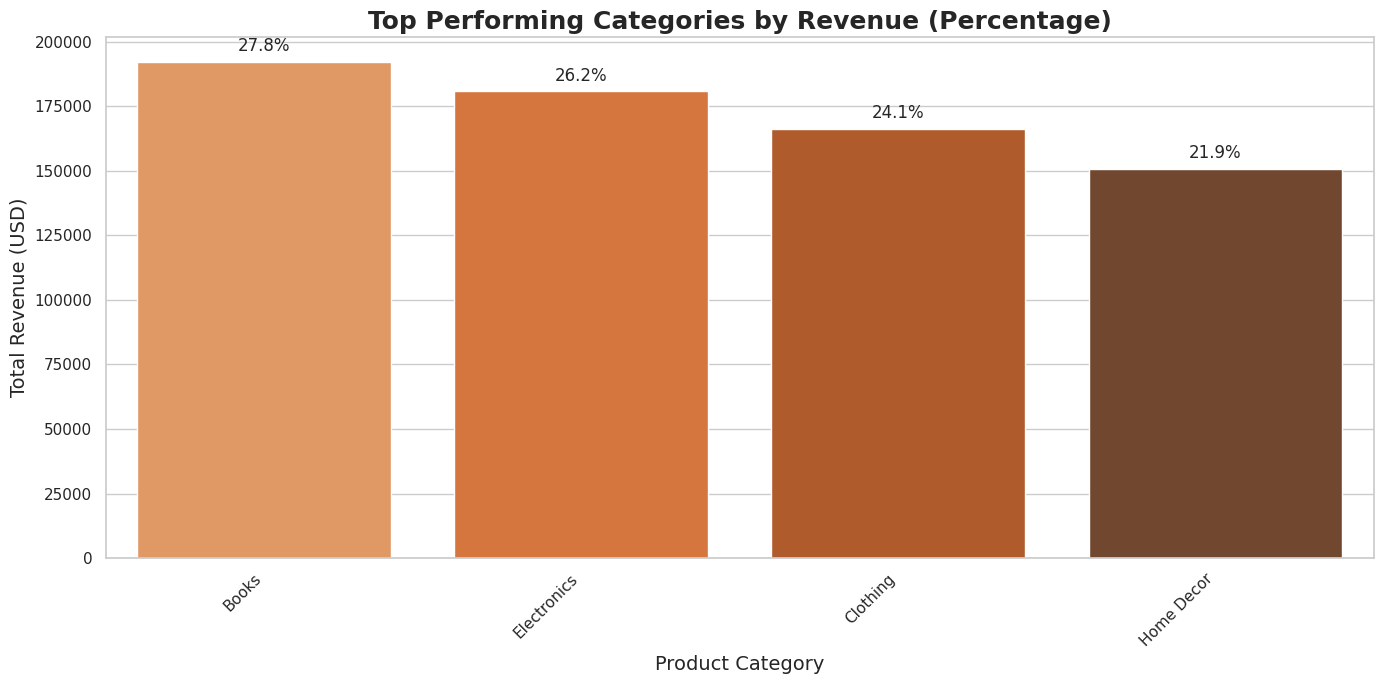

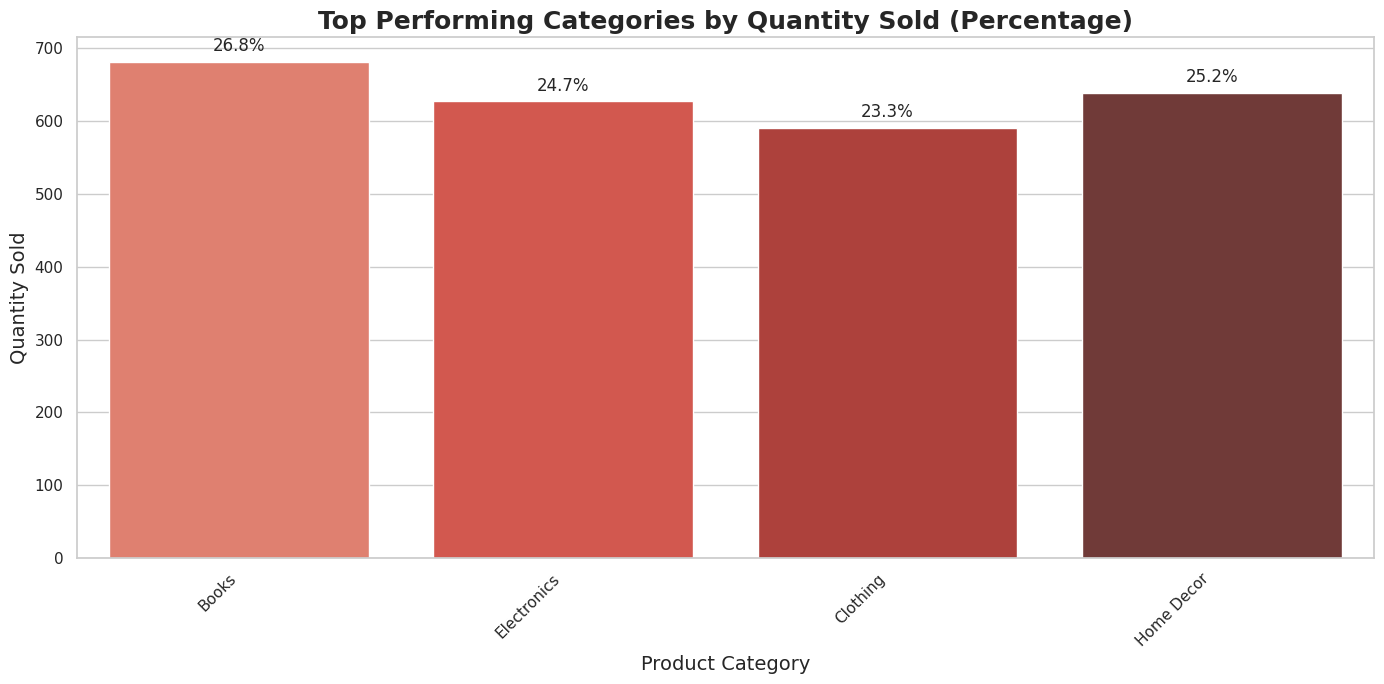

In [54]:
# Calculate percentages for TotalValue in categories
categories_total_value = top_categories['TotalValue']
total_value_sum = categories_total_value.sum()
percentages_total_value = (categories_total_value / total_value_sum) * 100

# Top Performing Categories by Total Value
plt.figure(figsize=(14, 7))
ax3 = sns.barplot(x=categories_total_value.index, y=categories_total_value, palette="Oranges_d")
add_percentage_labels(ax3, percentages_total_value)
plt.title('Top Performing Categories by Revenue (Percentage)', fontsize=18, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Revenue (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate percentages for Quantity in categories
categories_quantity = top_categories['Quantity']
quantity_sum = categories_quantity.sum()
percentages_quantity = (categories_quantity / quantity_sum) * 100

# Top Performing Categories by Quantity Sold
plt.figure(figsize=(14, 7))
ax4 = sns.barplot(x=categories_quantity.index, y=categories_quantity, palette="Reds_d")
add_percentage_labels(ax4, percentages_quantity)
plt.title('Top Performing Categories by Quantity Sold (Percentage)', fontsize=18, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Product ActiveWear Smartwatch contribute to 17.2% of the total revenue generated and Books contribute a significant 26.8% to overall revenue with almost equal revenue generated by the other categories all amounting to around 25%:, suggesting prioritizing inventory for these items.

In [55]:
import plotly.express as px

region_data = df.groupby('Region').agg({
    'CustomerID': 'nunique',
    'TotalValue': 'sum',
    'TransactionID': 'count'
}).reset_index()

region_data.rename(columns={
    'CustomerID': 'TotalCustomers',
    'TotalValue': 'TotalRevenue',
    'TransactionID': 'TotalTransactions'
}, inplace=True)

total_customers = region_data['TotalCustomers'].sum()
total_revenue = region_data['TotalRevenue'].sum()
region_data['CustomerPercentage'] = (region_data['TotalCustomers'] / total_customers) * 100
region_data['RevenuePercentage'] = (region_data['TotalRevenue'] / total_revenue) * 100

continent_coords = {
    'North America': (48.1667, -100.1667),
    'Europe': (54.5260, 35.2551),
    'Asia': (34.0479, 80.6197),
    'South America': (-14.2350, -55.9253),
    'Africa': (8.7832, 34.5085),
    'Australia': (-25.2744, 133.7751)
}

region_data['Latitude'] = region_data['Region'].map(lambda x: continent_coords[x][0])
region_data['Longitude'] = region_data['Region'].map(lambda x: continent_coords[x][1])

fig = px.scatter_geo(
    region_data,
    lat='Latitude',
    lon='Longitude',
    size='TotalCustomers',
    color='TotalRevenue',
    hover_name='Region',
    hover_data=['TotalCustomers', 'TotalRevenue', 'CustomerPercentage', 'RevenuePercentage'],
    title='Customer Distribution by Continent',
    projection='natural earth'
)

for i, row in region_data.iterrows():
    fig.add_annotation(
        x=row['Longitude'],
        y=row['Latitude'],
        text=f"{row['CustomerPercentage']:.1f}%",
        showarrow=False,
        font=dict(size=12, color='black')
    )

fig.update_geos(
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="lightgray"
)
fig.update_layout(
    title_font_size=20,
    title_x=0.5
)

fig.show()

Customers from South America generate the highest revenue marking to 210k which is nearly 31.79% of the total revenue by the 29.64% customers located in the region, highlighting the need for region-specific marketing strategies. To further expand the revenue, we can expand to operations in the remaining continents - i.e. Africa and Australia based on the evaluation of logistics and operating costs.

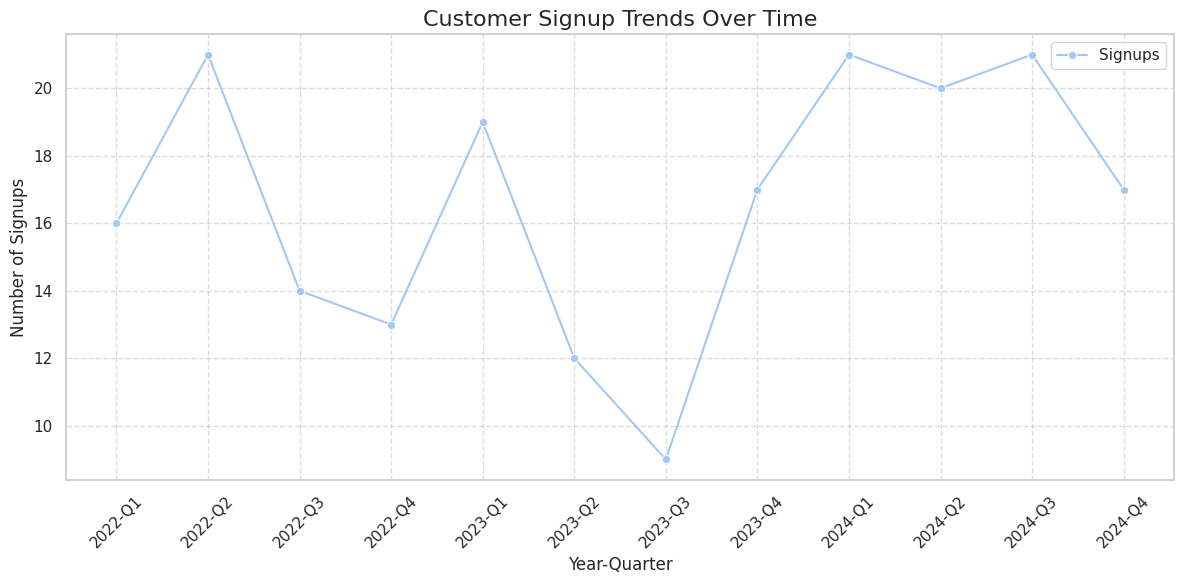

In [57]:
customers_df['Year'] = customers_df['SignupDate'].dt.year
customers_df['Month'] = customers_df['SignupDate'].dt.month
customers_df['Quarter'] = customers_df['SignupDate'].dt.quarter

signup_trends = customers_df.groupby(['Year', 'Quarter']).size().reset_index(name='Signups')
signup_trends['Year-Quarter'] = signup_trends['Year'].astype(str) + '-Q' + signup_trends['Quarter'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=signup_trends, x='Year-Quarter', y='Signups', marker='o', color='b', label='Signups')
plt.title('Customer Signup Trends Over Time', fontsize=16)
plt.xlabel('Year-Quarter', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.legend()
plt.show()

Customer signups peak during Q1 and Q2, indicating the success of seasonal marketing campaigns.

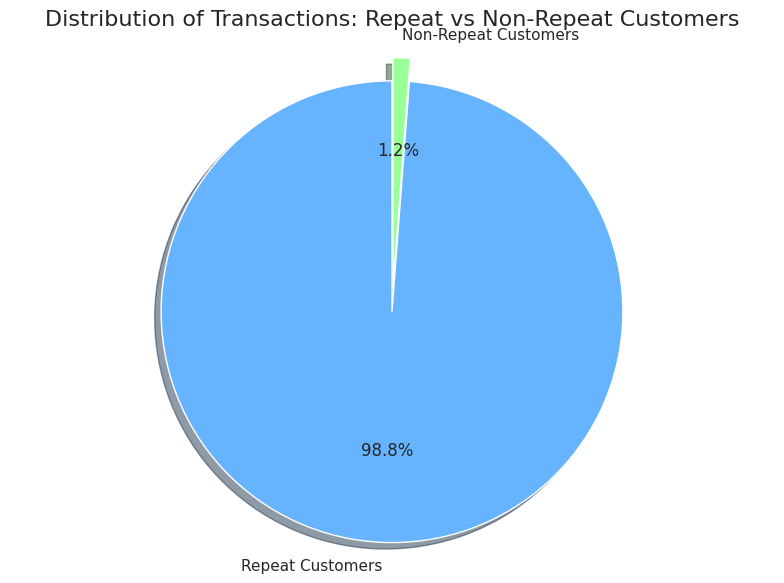

In [59]:
customer_transactions = df.groupby('CustomerID')['TransactionID'].count().reset_index(name='TransactionCount')
repeat_customers = customer_transactions[customer_transactions['TransactionCount'] > 1]
total_transactions = df['TransactionID'].nunique()
repeat_transactions = df[df['CustomerID'].isin(repeat_customers['CustomerID'])]['TransactionID'].nunique()
repeat_transaction_percentage = (repeat_transactions / total_transactions) * 100
repeat_customer_percentage = (len(repeat_customers) / len(customer_transactions)) * 100

labels = ['Repeat Customers', 'Non-Repeat Customers']
sizes = [repeat_transaction_percentage, 100 - repeat_transaction_percentage]
colors = ['#66b3ff', '#99ff99']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribution of Transactions: Repeat vs Non-Repeat Customers', fontsize=16)
plt.axis('equal')

plt.tight_layout()
plt.show()

98.8% of customers account for repeated transactions, emphasizing the value of loyalty programs to retain high-value customers.

Problem noticed: Marketing campaigns are inefficient in conversion of potential customers to actual customers. However, the business model and services are good enough to retain and increase repeated customers.

Average time from signup to first purchase: 228.15 days
Percentage of customers who make their first purchase within one week: 32.40%


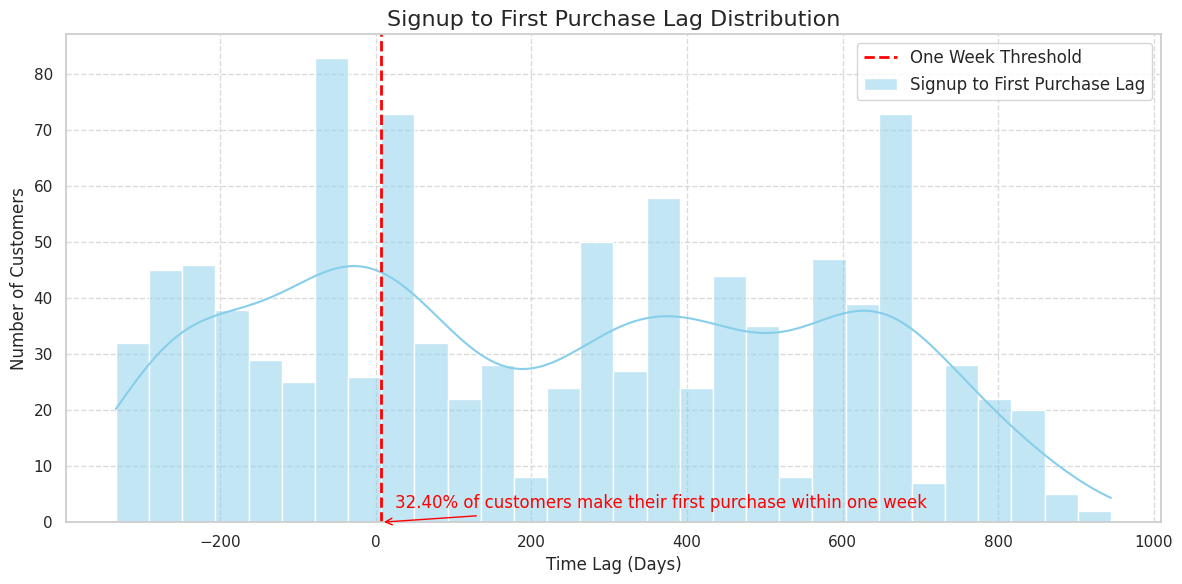

In [62]:
df['SignupDate'] = pd.to_datetime(df['SignupDate'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

first_purchase = df.groupby('CustomerID')['TransactionDate'].min().reset_index(name='FirstPurchaseDate')
customer_lag = pd.merge(first_purchase, df[['CustomerID', 'SignupDate']], on='CustomerID', how='left')
customer_lag['SignupToFirstPurchaseLag'] = (customer_lag['FirstPurchaseDate'] - customer_lag['SignupDate']).dt.days
average_lag = customer_lag['SignupToFirstPurchaseLag'].mean()
percentage_within_one_week = (customer_lag[customer_lag['SignupToFirstPurchaseLag'] <= 7].shape[0] / customer_lag.shape[0]) * 100

print(f"Average time from signup to first purchase: {average_lag:.2f} days")
print(f"Percentage of customers who make their first purchase within one week: {percentage_within_one_week:.2f}%")

plt.figure(figsize=(12, 6))
sns.histplot(customer_lag['SignupToFirstPurchaseLag'], bins=30, kde=True, color='skyblue', label='Signup to First Purchase Lag')
plt.axvline(x=7, color='red', linestyle='--', linewidth=2, label='One Week Threshold')
plt.annotate(f"{percentage_within_one_week:.2f}% of customers make their first purchase within one week",
             xy=(7, 0), xytext=(10, 10), textcoords='offset points', fontsize=12, color='red',
             arrowprops=dict(arrowstyle='->', color='red'))

plt.title('Signup to First Purchase Lag Distribution', fontsize=16)
plt.xlabel('Time Lag (Days)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Average time from signup to first purchase: 228.15 days. However, the percentage of customers who make their first purchase within one week: 32.40%. Few customers have also made purchases before completing the signup process leading to negative time lag. We can use this data to impose methods for increasing the customer retention ration.

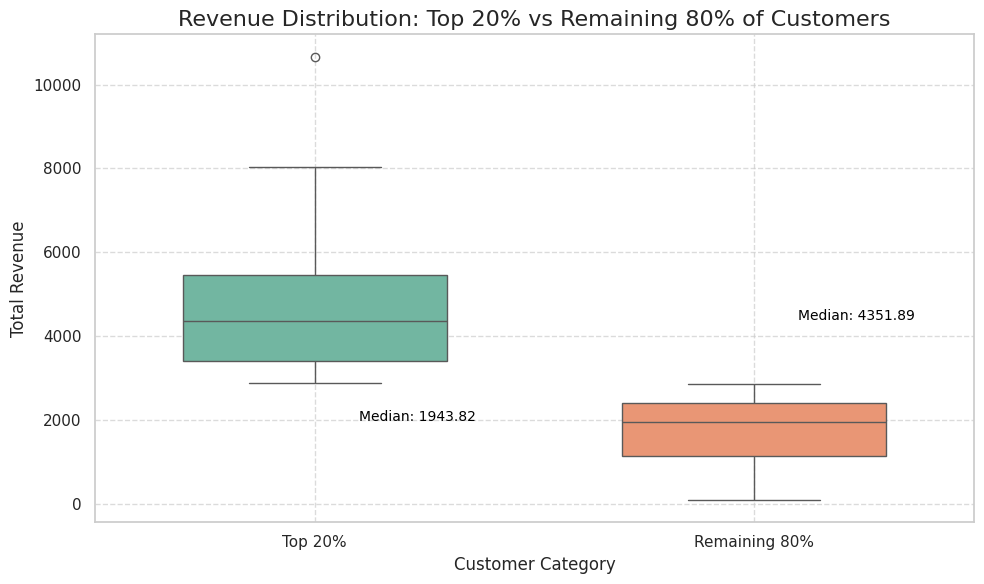

In [63]:
customer_revenue = df.groupby('CustomerID')['TotalValue'].sum().reset_index(name='TotalRevenue')
customer_revenue = customer_revenue.sort_values(by='TotalRevenue', ascending=False)
customer_revenue['CumulativeRevenue'] = customer_revenue['TotalRevenue'].cumsum()
customer_revenue['CumulativePercentage'] = (customer_revenue['CumulativeRevenue'] / customer_revenue['TotalRevenue'].sum()) * 100

top_20_percent_customers = customer_revenue[customer_revenue['CumulativePercentage'] <= 80]
remaining_customers = customer_revenue[customer_revenue['CumulativePercentage'] > 80]
customer_revenue['CustomerCategory'] = ['Top 20%' if x in top_20_percent_customers['CustomerID'].values else 'Remaining 80%' for x in customer_revenue['CustomerID']]

plt.figure(figsize=(10, 6))
sns.boxplot(x='CustomerCategory', y='TotalRevenue', data=customer_revenue, palette='Set2', width=0.6)
plt.title('Revenue Distribution: Top 20% vs Remaining 80% of Customers', fontsize=16)
plt.xlabel('Customer Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

medians = customer_revenue.groupby('CustomerCategory')['TotalRevenue'].median()
for i, category in enumerate(medians.index):
    median_value = medians[category]
    plt.annotate(f"Median: {median_value:.2f}", xy=(i, median_value), xytext=(i + 0.1, median_value + 20),
                 fontsize=10, color='black')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Focusing on retaining and rewarding the top 20% of customers\ncan optimize revenue and customer satisfaction.